Regresión lineal simple con Keras --- 
===

* Ultima modificación: Mayo 14, 2022 | YouTube

Modelo general de regresión lineal
---

En un modelo de regresión, la variable dependiente $y$ es una función lineal de las variables independientes $x_i$, tal que:


$$y = w_0 + \sum_{i=1}^N w_i * x_i + e$$


Donde: 


* $y$ es la variable explicada.


* $x_i$ es la $i$-ésima variable explicativa del comportamiento de $y$.


* $w_0$ es el intercepto del modelo.


* $w_i$ es el coeficiente de $x_i$.


* $e$ es el error del modelo. Se parte del supuesto de que siguiendo una distribución normal con media cero y varianza $\sigma^2$ constante y desconocida.

Regresión lineal simple
---

$$
y = w_0 + w1 \cdot x
$$

![assets/tensorflow_00002.png](assets/tensorflow_00002.png)

## Estimación

En la siguiente figura se presenta de forma general la regresión de $y_p = e + w_0 + w_1 * x_p$ para $p$ = 1, ..., 5. Los puntos negros representan los datos (las observaciones), y la línea negra representa la ecuación de regresión. Las líneas rojas representan el error $e$ entre el valor observado de $y_p$ y el pronósticado por el modelo para cada valor  $x_p$. 

![assets/tensorflow_00001.jpg](assets/tensorflow_00001.jpg) 

La estimación de los parámetros $w_i$ del modelo se realiza por mínimos cuadrados ordinarios (OLS), o lo que es lo mismo, minimizando el promedio de los errores al cuadrado (MSE)

$$\text{MSE} = \frac{1}{P} \sum_{p=1}^P e_p^2$$

Esto es, se deben encontrar los valores de $w_i$ que minimicen:

$$\text{MSE} = \frac{1}{P} \sum_{p=1}^P \left( y_p - w_0 - \sum_i^N w_i x_{p,i} \right)^2$$

para los $P$ patrones de ejemplo.

La estimación de los parámetros del modelo minimizando el MSE supone que los errores siguen una distribución normal con media cero y varianza finita y constante. 

Si las características están correlacionadas (dependencia lineal aproximada), los resultados son altamente sensitivos a los errores aleatorios en la variable objetivo.

## Dataset

In [1]:
from operator import itemgetter

import matplotlib.pyplot as plt
from sklearn.datasets import make_regression


def make_data():

    X, y_true = make_regression(
        n_samples=100,
        n_features=1,
        n_informative=1,
        bias=0.0,
        effective_rank=None,
        tail_strength=0.9,
        noise=12.0,
        shuffle=False,
        coef=False,
        random_state=0,
    )

    data = [p for p in zip(X.reshape(-1), y_true)]
    data = sorted(data, key=itemgetter(0))
    X = [p[0] for p in data]
    y_true = [p[1] for p in data]

    return X, y_true


X, y_true = make_data()

Gráfica de la muestra de datos
---

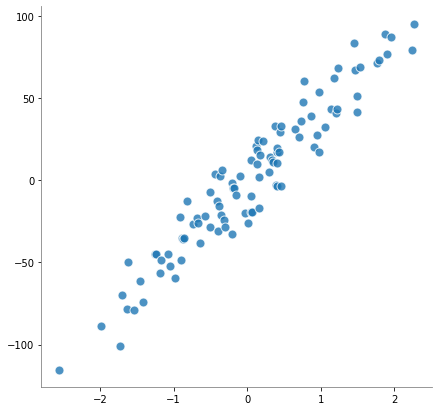

In [2]:
def plot_data(X, y_true, y_pred=None):
    plt.figure(figsize=(7, 7))
    plt.scatter(X, y_true, color="tab:blue", alpha=0.8, s=80, edgecolors="white")
    if y_pred is not None:
        plt.plot(X, y_pred, color="k", linewidth=2)
    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)


plot_data(X, y_true)

Importación de TensorFlow
--

In [3]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf

Creación del modelo
---

In [4]:
model = tf.keras.Sequential(
    tf.keras.layers.Dense(
        input_shape=[
            1,
        ],
        units=1,
    )
)

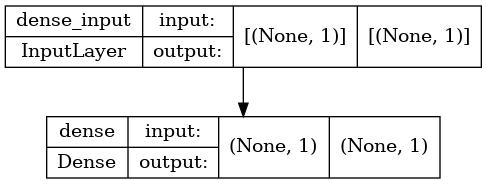

In [5]:
tf.keras.utils.plot_model(
    model,
    "/tmp/model.png",
    show_shapes=True,
)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Pronóstico con el modelo sin entrenar
--

In [7]:
y_pred = model.predict(X).reshape(-1)
y_pred

array([-2.186281  , -1.6962769 , -1.4783212 , -1.4611833 , -1.3960383 ,
       -1.3820792 , -1.3155792 , -1.2454622 , -1.216048  , -1.0728451 ,
       -1.0574567 , -1.0110475 , -0.9977889 , -0.9169508 , -0.8979399 ,
       -0.8369027 , -0.776975  , -0.76684266, -0.7602651 , -0.74571675,
       -0.7314143 , -0.6963468 , -0.6355612 , -0.5864447 , -0.5758689 ,
       -0.5432087 , -0.4957043 , -0.4374336 , -0.43644628, -0.37514976,
       -0.345265  , -0.34406954, -0.3316916 , -0.3106374 , -0.3079073 ,
       -0.2979384 , -0.26680145, -0.2588803 , -0.18218249, -0.17568955,
       -0.16029696, -0.15408061, -0.12961641, -0.0883926 , -0.02413416,
        0.00899181,  0.03918581,  0.04448401,  0.04809781,  0.05696275,
        0.10419774,  0.10868257,  0.11045595,  0.1233533 ,  0.13269094,
        0.13389117,  0.15194084,  0.17835857,  0.25902516,  0.26809898,
        0.2857457 ,  0.30517828,  0.32384366,  0.33132824,  0.34267905,
        0.34424803,  0.3445497 ,  0.35162055,  0.36680675,  0.38

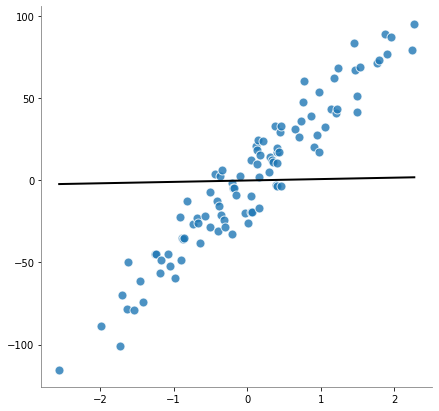

In [8]:
plot_data(X, y_true, y_pred)

Entrenamiento del modelo
---

In [9]:
model.compile(
    optimizer=tf.optimizers.SGD(
        learning_rate=0.01,
        momentum=0.0,
    ),
    loss="mean_squared_error",
)

In [10]:
history = model.fit(
    X,
    y_true,
    epochs=100,
    verbose=0,
)

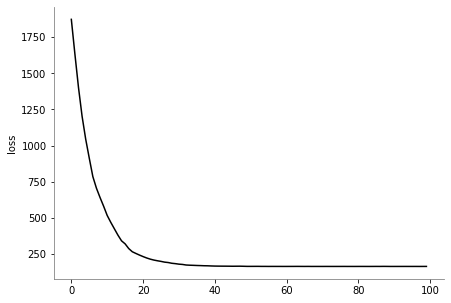

In [11]:
def plot_history(history):

    plt.figure(figsize=(7, 5))
    plt.plot(history.history["loss"], "k-")
    plt.ylabel("loss")

    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)


plot_history(history)

Evaluación del modelo
---

In [12]:
model.evaluate(
    X,
    y_true,
    verbose=0,
)

164.44215393066406

Pesos del modelo
---

In [13]:
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[42.573082]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-1.1339173], dtype=float32)>]

Pronóstico
--

In [14]:
y_pred = model.predict(X).reshape(-1)
y_pred

array([-109.82256   ,  -85.46253   ,  -74.62709   ,  -73.7751    ,
        -70.53648   ,  -69.84252   ,  -66.536545  ,  -63.05075   ,
        -61.58846   ,  -54.469276  ,  -53.70426   ,  -51.39707   ,
        -50.737938  ,  -46.71916   ,  -45.77405   ,  -42.73965   ,
        -39.760406  ,  -39.25669   ,  -38.929695  ,  -38.206436  ,
        -37.495407  ,  -35.752064  ,  -32.73017   ,  -30.288393  ,
        -29.76263   ,  -28.138964  ,  -25.777332  ,  -22.880466  ,
        -22.83138   ,  -19.78409   ,  -18.2984    ,  -18.23897   ,
        -17.623613  ,  -16.576927  ,  -16.441204  ,  -15.94561   ,
        -14.397669  ,  -14.003878  ,  -10.1909275 ,   -9.868137  ,
         -9.102911  ,   -8.793872  ,   -7.57766   ,   -5.528262  ,
         -2.3337216 ,   -0.68689907,    0.8141637 ,    1.0775583 ,
          1.2572143 ,    1.6979256 ,    4.046163  ,    4.269121  ,
          4.357283  ,    4.9984612 ,    5.462672  ,    5.5223403 ,
          6.4196606 ,    7.7329907 ,   11.743244  ,   12.19434

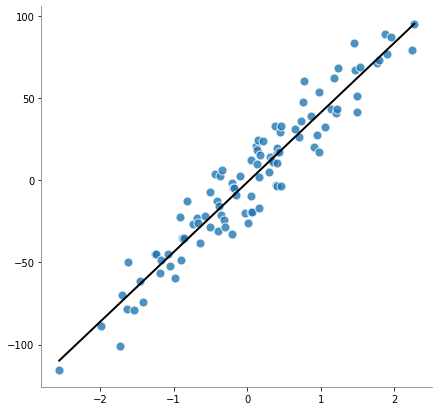

In [15]:
plot_data(X, y_true, y_pred)